In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from itertools import product
from tqdm.notebook import tqdm

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix  

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data/responses_.csv')

In [3]:
df.describe()

,AM1,AM2,AM3,AM4,DM1,DM2,DM3,DM4,EDT1,EDT2,...,SQ3,SQ4,FST1,FST2,FST3,FST4,FI1,FI2,FI3,FI4
count,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,4.08000,4.200000,4.325000,4.210000,4.120000,4.210000,4.165000,4.170000,4.245000,4.280000,...,3.915000,3.880000,3.775000,3.910000,2.290000,2.540000,3.965000,4.035000,4.030000,4.150000
std,0.74591,0.715935,0.656911,0.780349,0.792934,0.733889,0.728304,0.723684,0.766756,0.710015,...,0.825337,0.842108,0.746432,0.764738,1.035015,1.078991,0.644868,0.675319,0.708243,0.685456
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000
50%,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000
75%,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [4]:
df.isna().sum().sum()

0

In [5]:
df.columns

Index(['AM1', 'AM2', 'AM3', 'AM4', 'DM1', 'DM2', 'DM3', 'DM4', 'EDT1', 'EDT2',
       'EDT3', 'EDT4', 'EDT5', 'FM1', 'FM2', 'FM3', 'OTPM1', 'OTPM2', 'OTPM3',
       'OTPM4', 'PM1', 'PM2', 'PM3', 'PM4', 'QM1', 'QM2', 'QM3', 'QM4', 'SHE1',
       'SHE2', 'SHE3', 'SHE4', 'FS1', 'FS2', 'FS3', 'FS4', 'OEE1', 'OEE2',
       'OEE3', 'OEE4', 'CMP1', 'CMP2', 'CMP3', 'CMP4', 'CMP5', 'CMP6', 'CMP7',
       'PR1', 'PR2', 'PR3', 'PR4', 'A1', 'A2', 'A3', 'A4', 'RL1', 'RL2', 'RL3',
       'RL4', 'EM1', 'EM2', 'EM3', 'EM4', 'RS1', 'RS2', 'RS3', 'RS4', 'T1',
       'T2', 'T3', 'T4', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'FST1', 'FST2', 'FST3',
       'FST4', 'FI1', 'FI2', 'FI3', 'FI4'],
      dtype='object')

# Get Average Per Class

In [6]:
mama_list = []
baby_list = []
for i in list(df.columns):
    if baby_list == []:
        baby_list.append(i)
    if i[:-1] == baby_list[0][:-1]:
        baby_list.append(i)
    if i[:-1] != baby_list[0][:-1]:
        mama_list.append(list(set(baby_list)))
        baby_list = []
        baby_list.append(i)

In [7]:
mama_list.append(['FI1', 'FI2', 'FI3', 'FI4'])
mama_list

[['AM4', 'AM1', 'AM2', 'AM3'],
 ['DM4', 'DM3', 'DM1', 'DM2'],
 ['EDT5', 'EDT2', 'EDT3', 'EDT1', 'EDT4'],
 ['FM3', 'FM2', 'FM1'],
 ['OTPM4', 'OTPM3', 'OTPM2', 'OTPM1'],
 ['PM4', 'PM3', 'PM1', 'PM2'],
 ['QM2', 'QM1', 'QM3', 'QM4'],
 ['SHE4', 'SHE2', 'SHE3', 'SHE1'],
 ['FS3', 'FS1', 'FS4', 'FS2'],
 ['OEE2', 'OEE3', 'OEE1', 'OEE4'],
 ['CMP1', 'CMP3', 'CMP4', 'CMP2', 'CMP6', 'CMP7', 'CMP5'],
 ['PR1', 'PR2', 'PR3', 'PR4'],
 ['A4', 'A2', 'A1', 'A3'],
 ['RL4', 'RL3', 'RL2', 'RL1'],
 ['EM1', 'EM4', 'EM3', 'EM2'],
 ['RS3', 'RS1', 'RS4', 'RS2'],
 ['T3', 'T1', 'T2', 'T4'],
 ['SQ2', 'SQ4', 'SQ1', 'SQ3'],
 ['FST1', 'FST4', 'FST3', 'FST2'],
 ['FI1', 'FI2', 'FI3', 'FI4']]

In [8]:
median_df = pd.DataFrame()

for baby_list in mama_list:
    marker = baby_list[0][:-1]
    ave = df[baby_list].median(axis=1).values
    ceil = ave # np.ceil(ave)
    median_df[marker] = ceil

In [9]:
median_df.to_csv('data/median_df.csv', index=False) #Save Median

In [10]:
median_df.shape

(200, 20)

In [11]:
median_df

,AM,DM,EDT,FM,OTPM,PM,QM,SHE,FS,OEE,CMP,PR,A,RL,EM,RS,T,SQ,FST,FI
0,4.0,4.0,4.0,4.0,4.0,4.0,4.5,4.0,4.5,4.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
1,4.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,5.0,3.5,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
2,4.0,4.0,3.0,4.0,2.0,4.0,4.5,5.0,5.0,5.0,4.0,4.0,1.5,2.0,3.0,3.0,3.0,2.5,2.5,4.0
3,5.0,5.0,5.0,5.0,3.5,4.0,4.5,5.0,5.0,4.0,5.0,3.0,3.0,4.0,3.5,3.5,4.0,3.5,3.0,4.0
4,5.0,3.5,4.0,4.0,2.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,4.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.5,3.5,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0
196,4.0,4.0,4.0,4.0,4.0,4.0,3.5,3.5,3.5,3.5,4.0,3.5,4.0,4.0,3.5,3.5,4.0,3.5,2.5,4.0
197,4.0,3.5,4.0,4.0,3.5,4.0,3.5,3.5,4.0,3.5,4.0,4.0,4.0,4.0,4.0,3.5,3.5,3.5,3.5,3.5
198,4.0,4.0,5.0,4.0,4.5,4.0,4.0,4.0,5.0,5.0,5.0,4.5,4.5,5.0,4.5,5.0,5.0,4.0,3.0,4.0


# Perform Chi-Square Test

In [12]:
cat_var1  = list(median_df.columns)
cat_var2  = list(median_df.columns)

In [13]:
# Get All Possible Combinations

cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [14]:
result = []

for i in tqdm(cat_var_prod):
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
            median_df[i[0]], median_df[i[1]])))[1]))

  0%|          | 0/400 [00:00<?, ?it/s]

In [15]:
chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
chi_test_output['coeff'] = np.around(chi_test_output['coeff'].values, decimals=3)
pivot_ct = chi_test_output.pivot(index='var1', columns='var2', values='coeff')

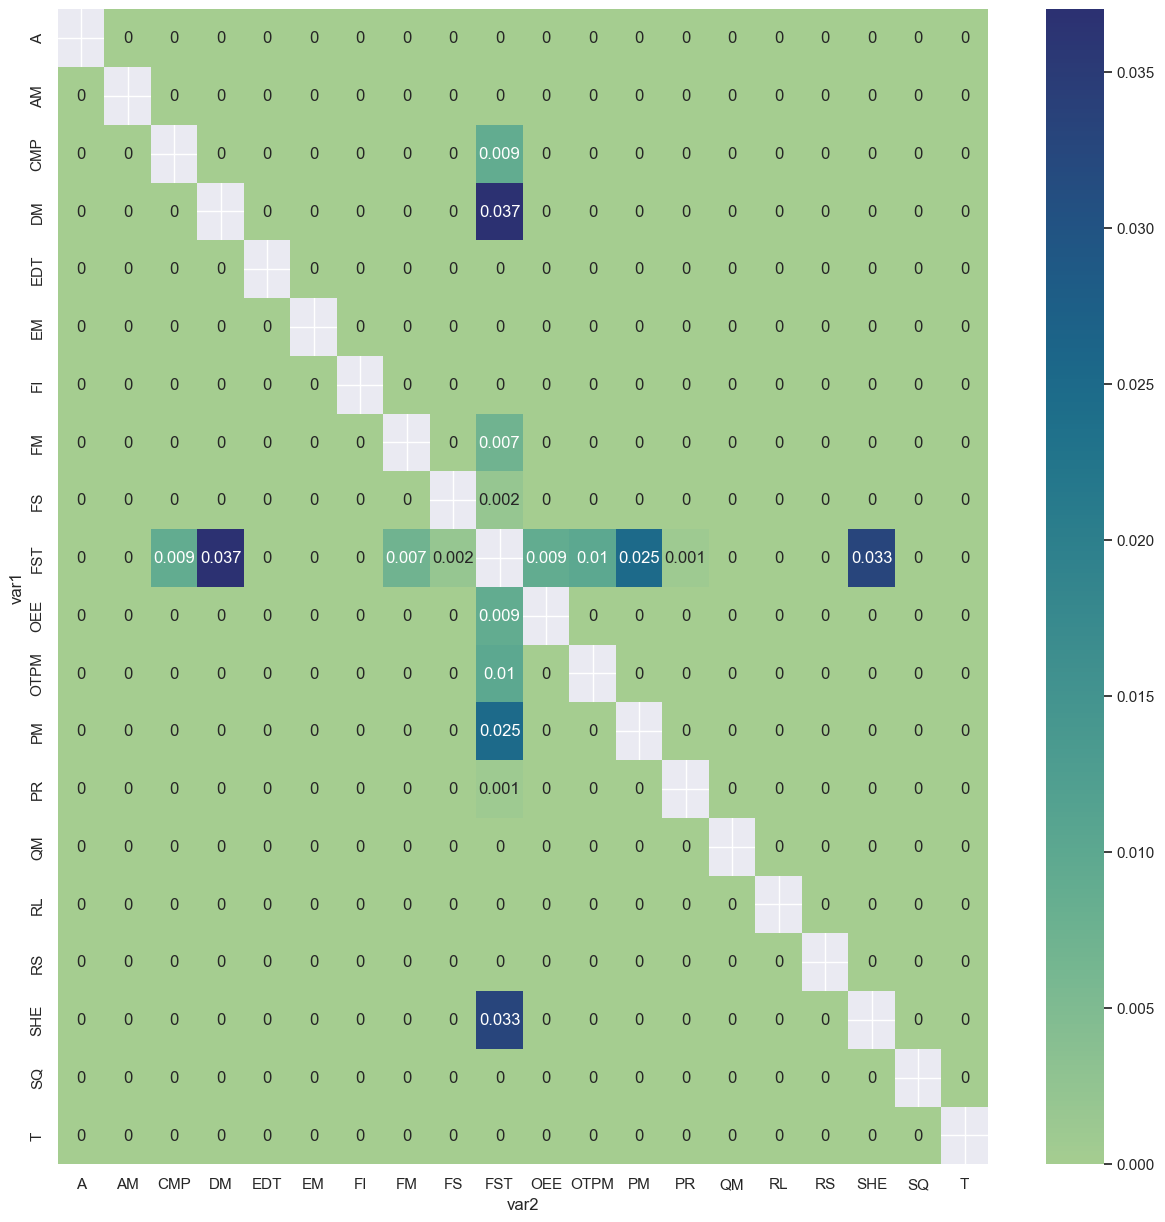

In [16]:
plt.figure(figsize=(15,15))
sns.heatmap(pivot_ct, annot=True, cmap='crest')

plt.show()

# Visualize the Data

In [17]:
data = median_df.copy()

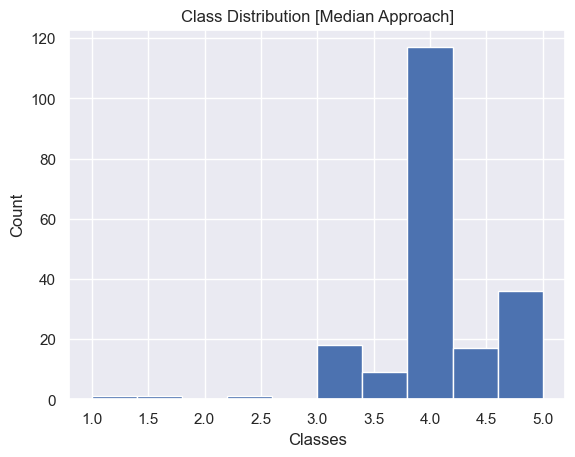

In [36]:
plt.hist(data.FI)
plt.ylabel('Count')
plt.xlabel('Classes')
plt.title('Class Distribution [Median Approach]')
plt.show()

In [19]:
inputs_cols = list(data.drop('FI', axis=1).columns)
scaler = MinMaxScaler()
inputs = scaler.fit_transform(data[inputs_cols])
outputs = scaler.fit_transform(data['FI'].values.reshape(-1,1))

In [20]:
mapping_dict = dict(zip(list(np.unique(outputs)), [x for x in range(1,np.unique(outputs).shape[0]+1,1)]))
reverse_mapping_dict = dict(zip([x for x in range(1,np.unique(outputs).shape[0]+1,1)], list(np.unique(outputs))))

In [21]:
outputs = pd.DataFrame(outputs, columns=['FI'])['FI'].map(mapping_dict)

In [22]:
X = inputs
y = outputs

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11042001)

In [24]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')

print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (160, 19)
Shape of X_test: (40, 19)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [25]:
mlp = MLPClassifier(hidden_layer_sizes=(1,100), 
                    activation='tanh', 
                    solver='adam', 
                    max_iter=1000,
                    early_stopping=True,
                    verbose=True, 
                    learning_rate='adaptive',
                    learning_rate_init=1e4)

In [26]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.04923889
Validation score: 0.500000
Iteration 2, loss = 28443.51862631
Validation score: 0.000000
Iteration 3, loss = 43412.82623463
Validation score: 0.000000
Iteration 4, loss = 56752.16324319
Validation score: 0.187500
Iteration 5, loss = 75139.84831364
Validation score: 0.187500
Iteration 6, loss = 95475.00720675
Validation score: 0.187500
Iteration 7, loss = 108102.41412916
Validation score: 0.125000
Iteration 8, loss = 134024.78746384
Validation score: 0.500000
Iteration 9, loss = 151295.08837004
Validation score: 0.125000
Iteration 10, loss = 171490.32652935
Validation score: 0.500000
Iteration 11, loss = 191428.50236539
Validation score: 0.500000
Iteration 12, loss = 211957.70266206
Validation score: 0.500000
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(1, 100), learning_rate='adaptive',
              learning_rate_init=10000.0, max_iter=1000, verbose=True)

In [27]:
y_pred = mlp.predict(X_test)

In [28]:
y_pred

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=int64)

In [29]:
y_test.values

array([6, 6, 6, 8, 4, 4, 6, 6, 8, 2, 6, 8, 6, 8, 6, 8, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 8, 6, 6, 6, 8, 6, 6, 5, 4, 5, 8, 7, 6, 6, 6], dtype=int64)

In [30]:
print("Accuracy of the Model:", accuracy_score(y_test, y_pred))

Accuracy of the Model: 0.575


In [31]:
type(y_test)

pandas.core.series.Series

In [32]:
y_test_ = pd.DataFrame(y_test)['FI'].map(reverse_mapping_dict)
y_pred_ = pd.DataFrame(y_pred, columns=['FI'])['FI'].map(reverse_mapping_dict)

In [33]:
set(y_pred_)

{0.75}

In [34]:
y_test_unscaled = scaler.inverse_transform(y_test_.values.reshape(-1,1))
y_pred_unscaled = scaler.inverse_transform(y_pred_.values.reshape(-1,1))

In [ ]:
yt = pd.Series(y_test_unscaled.reshape(1,-1)[0])
yp = pd.Series(y_pred_unscaled.reshape(1,-1)[0])

In [ ]:
set(yt)

In [ ]:
set(yp)

In [ ]:
results = pd.DataFrame([yt,yp]).T
results.columns = ['Test', 'Preds']

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap visualization using Seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()